<a href="https://colab.research.google.com/github/dheerajpreetsingh/DAI_Assignment/blob/main/assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DAI Assignment 2/tips (data for regression problem).csv")
df = pd.DataFrame(data)
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
X = df.drop('tip', axis=1)
y = df['tip']

In [7]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression (SVR)': SVR(kernel='rbf', C=1.0),
    'K-Nearest Neighbors (KNN)': KNeighborsRegressor(n_neighbors=5)
}

In [11]:
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'MAE': mae, 'R^2': r2}

results_df = pd.DataFrame(results).T
print("Model Evaluation Metrics:\n", results_df)

Model Evaluation Metrics:
                                       MSE       MAE       R^2
Linear Regression                0.703357  0.667133  0.437302
Ridge Regression                 0.700651  0.666859  0.439466
Lasso Regression                 0.612210  0.654809  0.510221
Decision Tree Regression         0.848990  0.690545  0.320792
Random Forest Regression         0.918199  0.752882  0.265424
Support Vector Regression (SVR)  0.709525  0.646897  0.432367
K-Nearest Neighbors (KNN)        0.814505  0.716000  0.348381


In [13]:
best_model = Lasso(alpha=0.1)
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', best_model)])
pipeline_lasso.fit(X_train, y_train)

# Extract coefficients as feature importances from Lasso
coefficients = pipeline_lasso.named_steps['regressor'].coef_
feature_names = numeric_features.tolist() + list(pipeline_lasso.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df['Importance'] = feature_importance_df['Coefficient'].abs()  # Use absolute value for importance

# Sort and display feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Lasso):\n", feature_importance_df)


Feature Importance (Lasso):
       Feature  Coefficient  Importance
0  total_bill     0.731173    0.731173
1        size     0.184788    0.184788
2    sex_Male     0.000000    0.000000
3  smoker_Yes    -0.000000    0.000000
4     day_Sat    -0.000000    0.000000
5     day_Sun     0.000000    0.000000
6    day_Thur    -0.000000    0.000000
7  time_Lunch    -0.000000    0.000000


#### The Fators that significantly impact Tips are total_bill with a coefficient of 0.73 and size with a coefficient of 0.18



*   Improving server attentiveness on larger party sizes could yield higher tips.
*   Promotions or special service for high-spending customers could improve revenue.



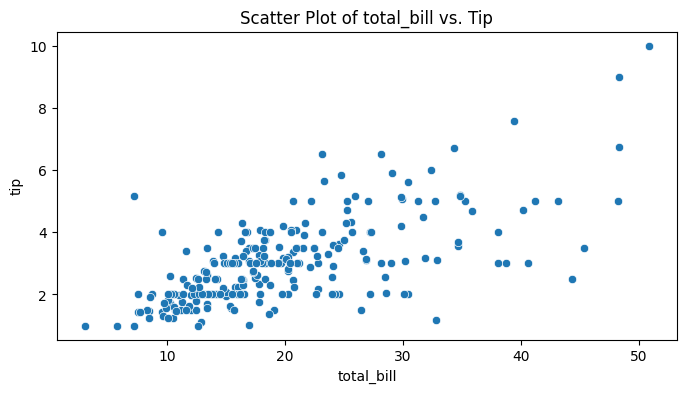

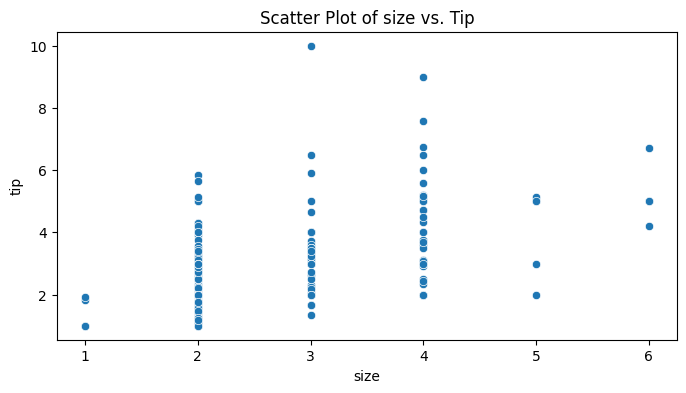

In [28]:
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=feature, y='tip')
    plt.title(f'Scatter Plot of {feature} vs. Tip')
    plt.show()

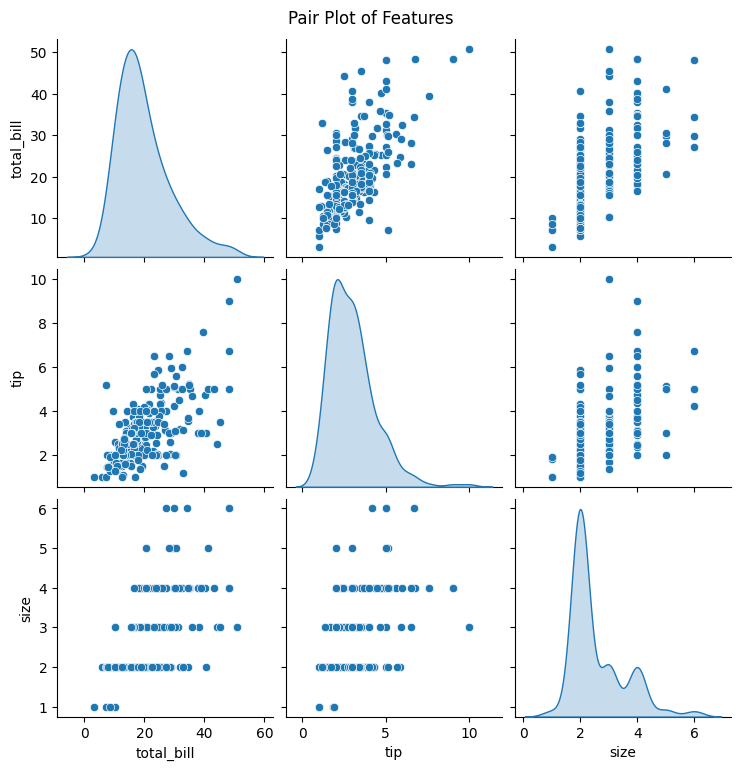

In [16]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

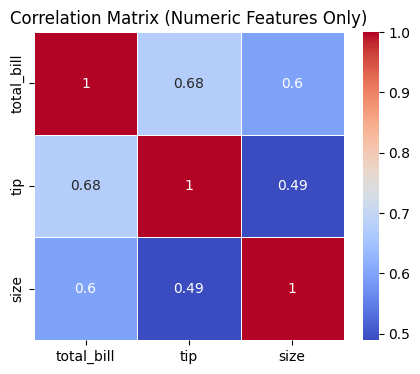

In [26]:
plt.figure(figsize=(5, 4))
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Compute correlation matrix for numeric columns only
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()

In [21]:
X_numeric = df[numeric_features]
X_numeric = sm.add_constant(X_numeric)
y = df['tip']
model = sm.OLS(y, X_numeric).fit()

In [22]:
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow Test: Statistic={rainbow_stat}, p-value={rainbow_p_value}")
if rainbow_p_value < 0.05:
    print("The Rainbow test suggests that linearity is likely violated.")
else:
    print("The Rainbow test suggests a linear relationship is appropriate.")

Rainbow Test: Statistic=1.1902656646832817, p-value=0.17048935693447634
The Rainbow test suggests a linear relationship is appropriate.


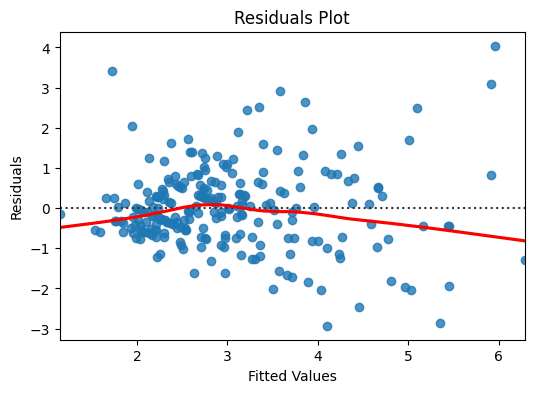

In [23]:
plt.figure(figsize=(6, 4))
sns.residplot(x=model.predict(X_numeric), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

In [24]:
linear_model = LinearRegression()
pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', linear_model)])
pipeline_linear.fit(X_train, y_train)

y_pred_linear = pipeline_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R^2 Score: {r2_linear}")


Linear Regression Model Performance:
Mean Squared Error: 0.7033566017436105
Mean Absolute Error: 0.6671331480264895
R^2 Score: 0.43730181943482505
